### Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression # to apply Logistic Regression
from sklearn.model_selection import train_test_split # to split the data into two
from sklearn.model_selection import KFold # cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.ensemble import RandomForestClassifier # to apply Random Forest Classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for checking error and accuracy of model
from sklearn import svm, datasets # to apply Support Vector Machine
from sklearn.svm import SVC



In [60]:
# Load the data
headers = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean",
          "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
          "concavepoints_mean", "symmetry_mean", "fractal_dimension_mean", 
           "radşus_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
           "compactness_se", "concavity_se", "concavepoints_se", "symmetry_se",
           "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
          "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
          "concavepoints_worst", "symmetry_worst", "fractal_dimension_worst", "unnamed"]
df = pd.read_csv("./wdbc.data", header=None, names= headers)
df = df.reset_index(drop= True)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst,unnamed
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
# count the number of rows and columns in the data set
df.shape

(569, 33)

In [62]:
# Number of empty values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concavepoints_mean           0
symmetry_mean                0
fractal_dimension_mean       0
radşus_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concavepoints_se             0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concavepoints_worst          0
symmetry_worst               0
fractal_dimension_worst      0
unnamed 

In [63]:
# Drop the column with all missing values
df.dropna(axis= 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concavepoints_mean       569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radşus_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [64]:
df.shape

(569, 32)

In [65]:
# Check if there are any duplicated values 
df.duplicated().sum()

0

In [66]:
# number of Malignant or Benign cells
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [67]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concavepoints_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radşus_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concavepoints_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concavepoints_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [68]:
#drop column 'id'
#seperate target from features

y = df.diagnosis # target = M or B

lst = ['id', 'diagnosis']
features = df.drop(lst, axis= 1, inplace= False)

# drop id column
df.drop(labels= 'id', axis= 1, inplace= True)
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [69]:
df.to_csv('data.csv', index= False, header= True)
a12 = pd.read_csv('data.csv')
a12

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### EDA

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

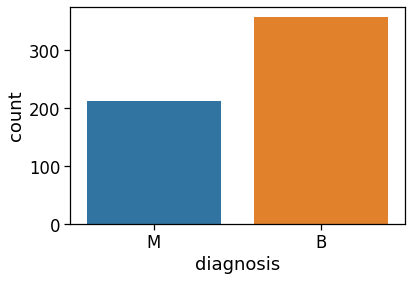

In [70]:
sns.countplot(x= df.diagnosis, label = 'Count')

The target variable, as shown in the bar chart above, has unbalanced data. In other words, classes are not represented equally. One way to deal with this issue is resampling.

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concavepoints_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Ten features were computed for each cell nucleus: radius, texture, perimeter, area, smoothness, compactness, concavity, convace points, symmetry and fractal dimension. In addition, mean, standart error(se) and  "worst" mean were also registered for each feature.

Data are distrubuted in wide range, therefore, features need to be standartized before visualization, so they have a mean of 0 and standard deviation of 1

In [72]:
# Standardization of features

stdX = (features - features.mean()) / (features.std())

data_st = pd.concat(objs= [y, stdX.iloc[:,:]], axis= 1)
data_st = pd.melt(data_st, id_vars= 'diagnosis',
                            var_name='features',
                             value_name='value')

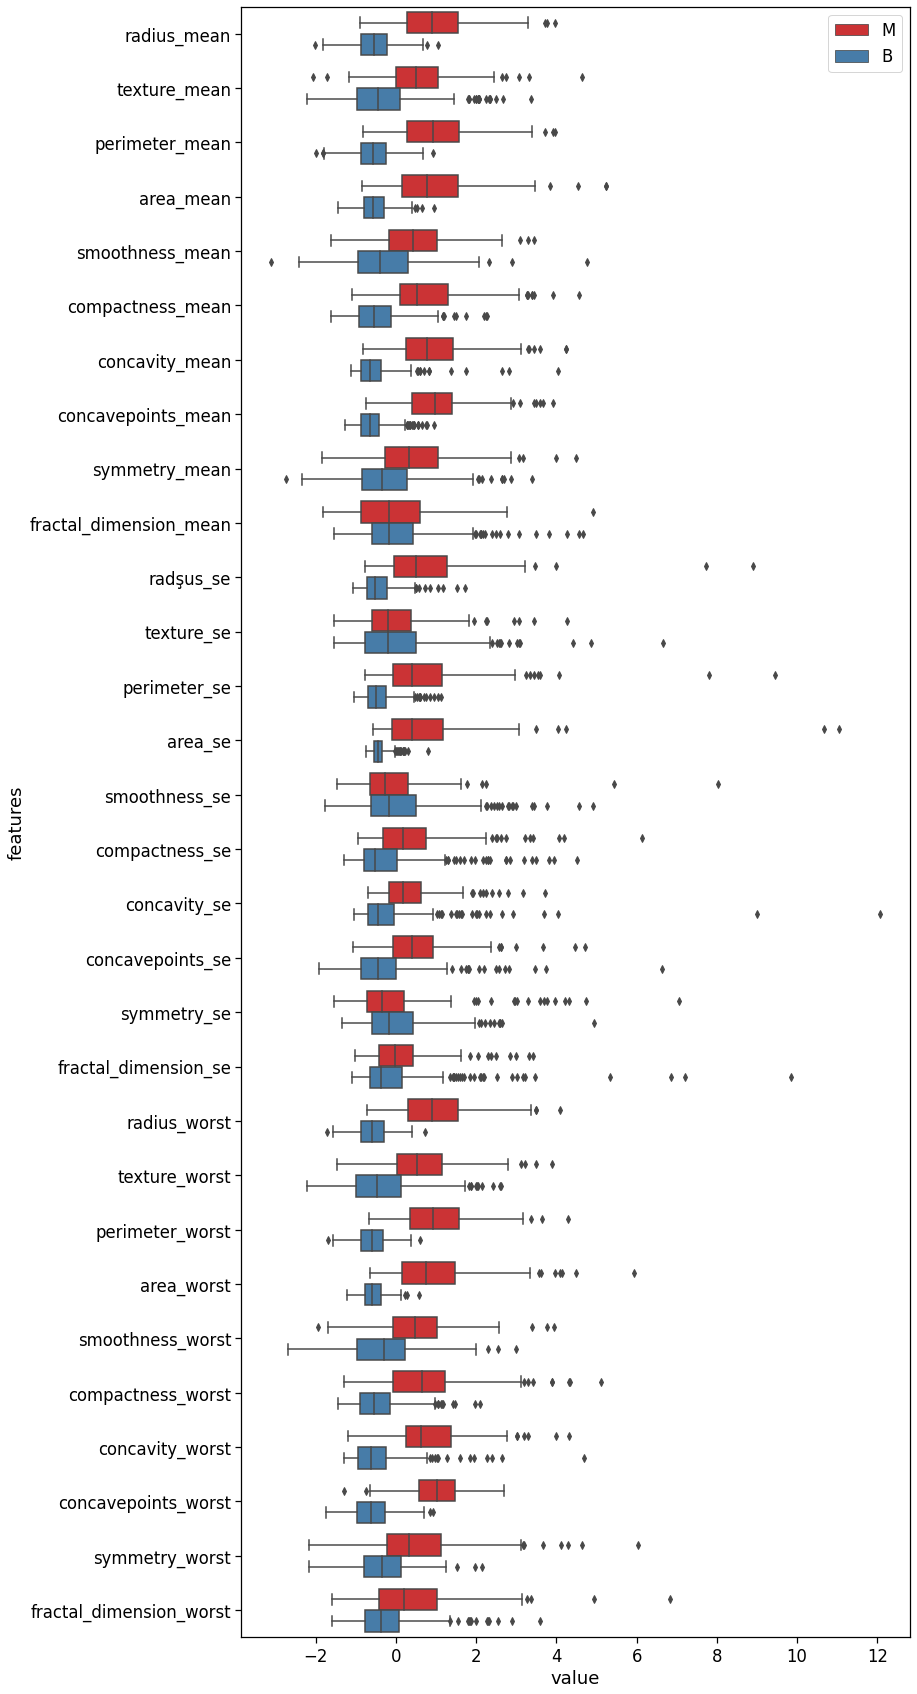

In [73]:
# Boxplot of features by diagnosis
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale= 1.5)
sns.boxplot(x='value', y='features', hue= 'diagnosis', data= data_st
            , palette= 'Set1')
plt.legend(loc='best')

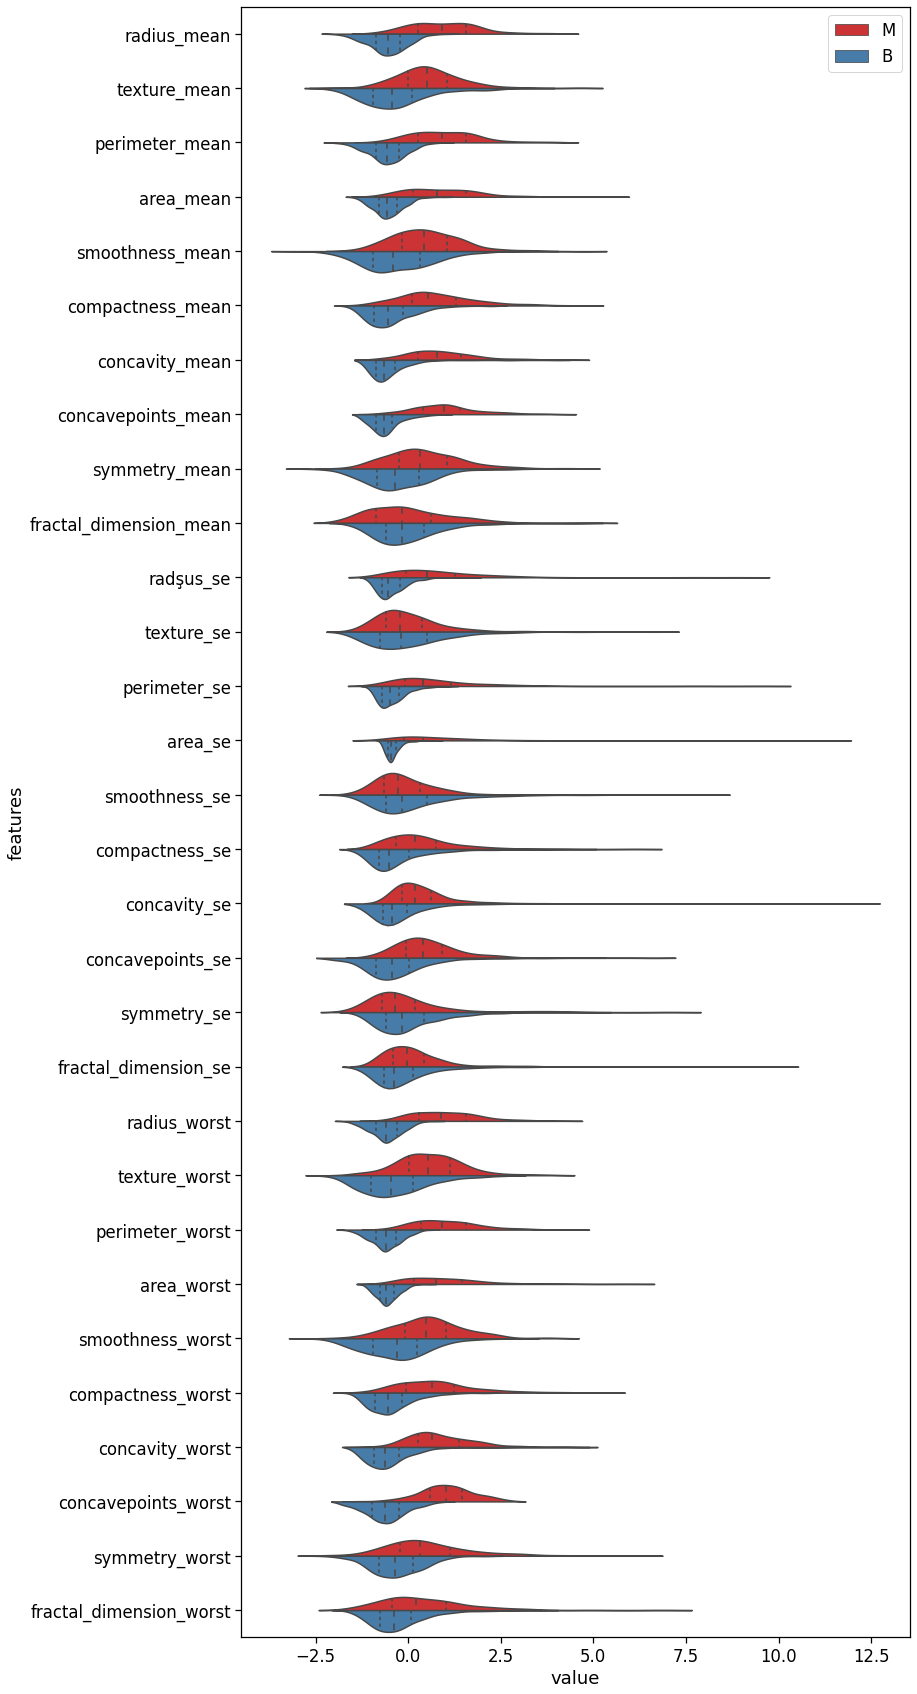

In [74]:
#Violin plot of features by diagnosis
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale= 1.5)
sns.violinplot(x= 'value', y= 'features', hue= 'diagnosis', data= data_st,
              split= True, inner= 'quart', palette='Set1')
plt.legend(loc = 'best')

### Correlation

<AxesSubplot:>

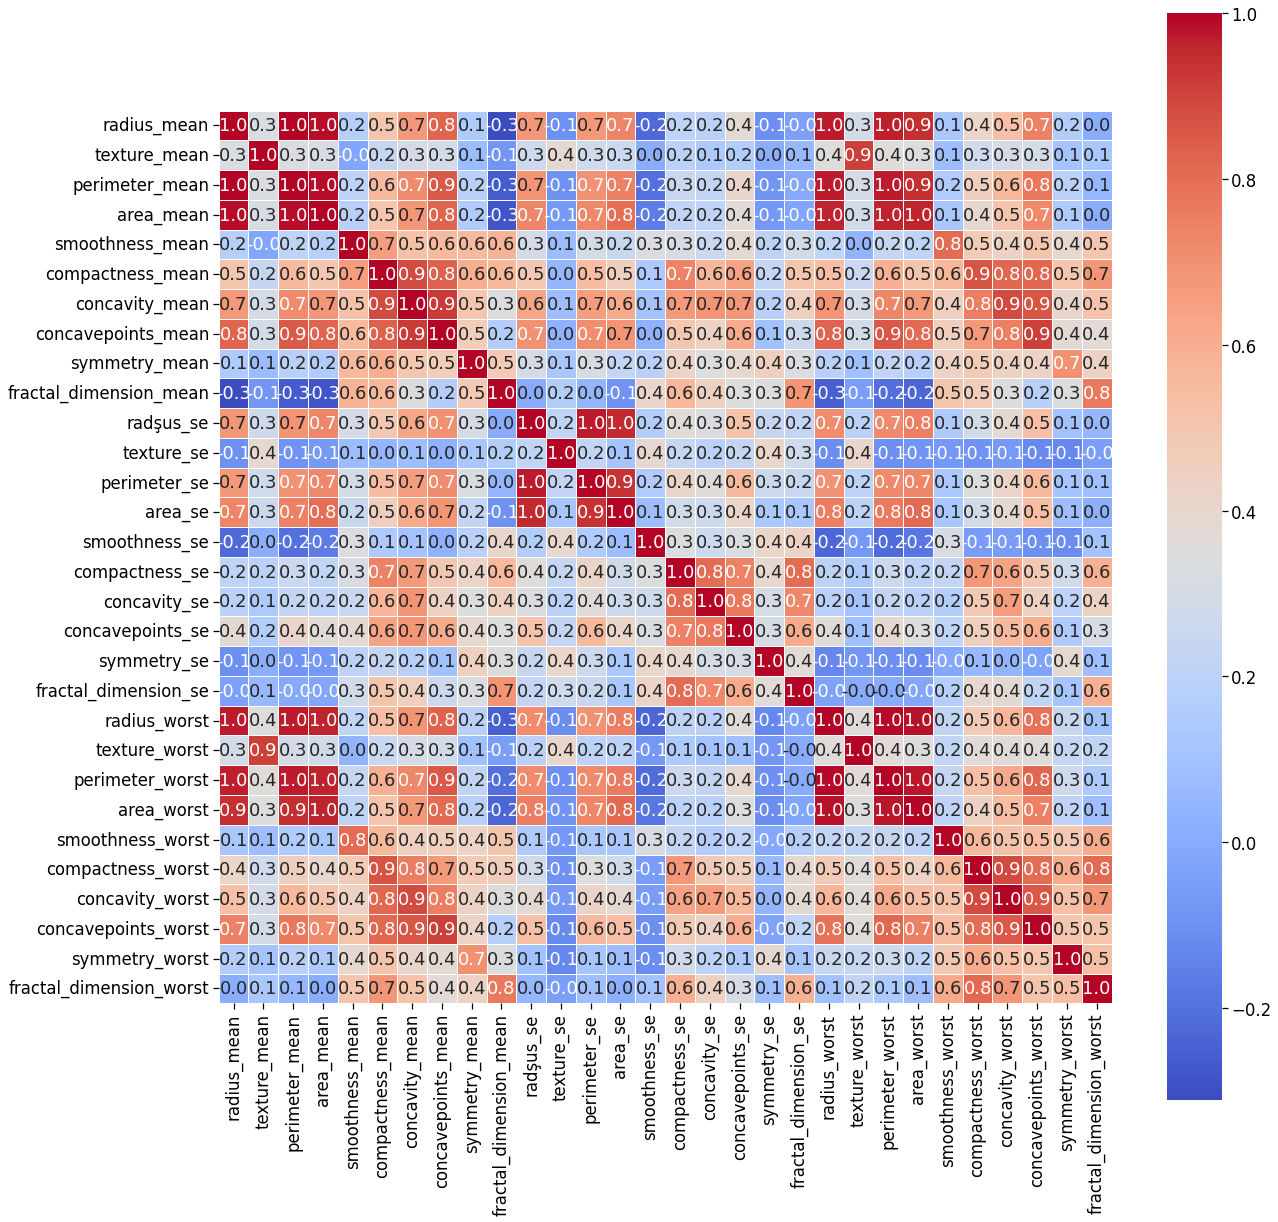

In [75]:
corr = df.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corr, cbar= True, square= True, annot= True, fmt= '.1f',
           xticklabels= True, yticklabels= True, cmap= 'coolwarm', linewidths= .5,
           ax= ax)

In [76]:
# Find un-correlated variables by using Pearson correlation coefficient between
# two arrays

def pearson_r(x, y):
    """Find un-correlated variables by using Pearson correlation coefficient between
    two arrays"""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # return [0, 1]
    return corr_mat[0, 1]

# Compute Pearson correlation coefficient for 'radius_mean' and 
# 'symmetry_mean'

r1 = pearson_r(df.radius_mean, df.perimeter_mean)
r2 = pearson_r(df.radius_mean, df.symmetry_mean)

name_c = []

for (i, j) in zip(range(1, 31), range(1, 31)):
    r = pearson_r(df.iloc[:, 1], df.iloc[:, j])
    
    if abs(r) >= 0.80 and df.columns[j] not in name_c:
        name_c.append(df.columns[j])

print()
print('* Lenght of columns assuming r >=0.80:', len(name_c)) 
print('name_c =',name_c)   
    



* Lenght of columns assuming r >=0.80: 7
name_c = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavepoints_mean', 'radius_worst', 'perimeter_worst', 'area_worst']


In [77]:
name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(df.iloc[:,1], df.iloc[:,j])
        if abs(r) <= 0.40 and df.columns[j]  not in name_c:
                    name_c.append(df.columns[j])
                            
print('* Lenght of columns assuming r <=0.40:', len(name_c)) 
print('name_c =',name_c) 

* Lenght of columns assuming r <=0.40: 15
name_c = ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concavepoints_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


Uncorrelated data are poentially more useful


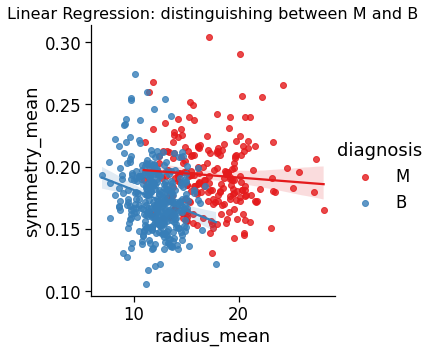

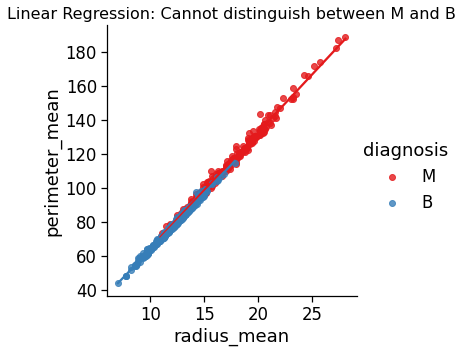

In [78]:
sns.lmplot(x= 'radius_mean', y= 'symmetry_mean', data= df, hue= 'diagnosis',
          palette= 'Set1')
plt.title('Linear Regression: distinguishing between M and B', size = 16)


sns.lmplot(x= 'radius_mean', y= 'perimeter_mean', data= df, hue= 'diagnosis',
          palette= 'Set1')
plt.title('Linear Regression: Cannot distinguish between M and B', size=16)

print('Uncorrelated data are poentially more useful')

### Classification Models

In [79]:
# Encode the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:, 0] = le.fit_transform(df.iloc[:, 0].values)

In [80]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Splitting the data into train (%70) and test %30)

In [81]:
X = df.drop('diagnosis', axis= 1)
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 21,
                                                    stratify= y)

print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### k-nearest neighbours (KNN)
A KNN classifier with 3 neighbours was created and fitted to the training data

In [82]:
# creating knn classifier with 3 neighbours
knn = KNeighborsClassifier(n_neighbors= 3)

# fit the classifier to the training data
knn.fit(X_train, y_train)

# print the accuracy
print('Accuracy KNN(1): ', knn.score(X_test, y_test))

Accuracy KNN(1):  0.9298245614035088


### Learning curves: over/underfitting
The learning curves for k-NN model were constructed, varying the number of neighbors. The results can be seen bellow.

([<matplotlib.axis.XTick at 0x1d484c9c280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

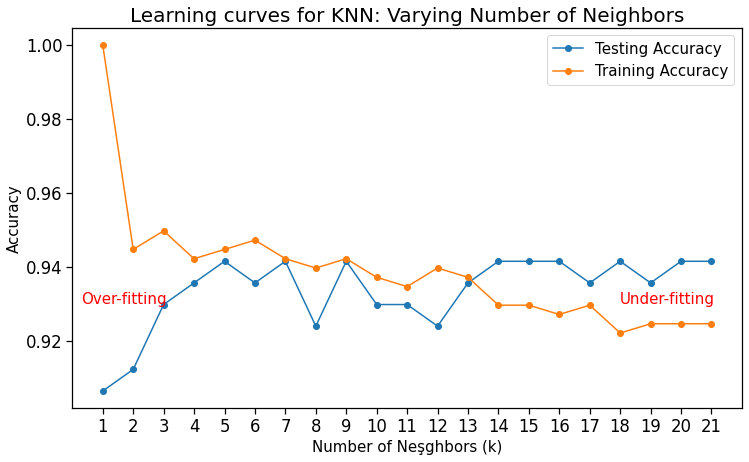

In [83]:
neighbors = np.arange(1, 22)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    
    # compute accuracy on training and testing sets
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.figure(figsize= (12, 7))
sns.set_context('notebook', font_scale= 1.5)
plt.title('Learning curves for KNN: Varying Number of Neighbors', size = 20)
plt.plot(neighbors, test_accuracy, marker = 'o', label= 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, marker = 'o', label= 'Training Accuracy')
plt.legend(prop = {'size': 15 })
plt.xlabel('Number of Neşghbors (k)', size= 15)
plt.ylabel('Accuracy', size= 15)
plt.annotate('Over-fitting', xy=(0.5, 0.94), xytext=(0.3, 0.93), size=15, color='red')
plt.annotate('Under-fitting', xy=(0.5, 0.94), xytext=(18, 0.93), size=15, color='red')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))


It is seen from above over-fitting (low k) and under-fitting (high k).

We can find the optimized values of k via GridSearchCV in scikit-learn

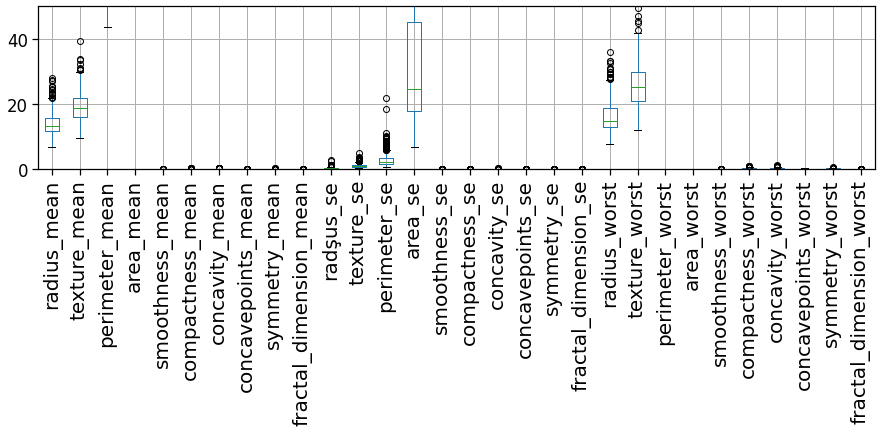

In [84]:
# data are distributed in a wide range, need to be normalized
plt.figure(figsize=(15,3))
ax= df.drop('diagnosis', axis=1).boxplot(df.columns.name, rot=90)
plt.xticks( size=20)
ax.set_ylim([0,50]);

{'knn__n_neighbors': 7}

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.92      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Best score is: 0.9698101265822784


Text(0.5, 1.0, 'Confusion Matrix')

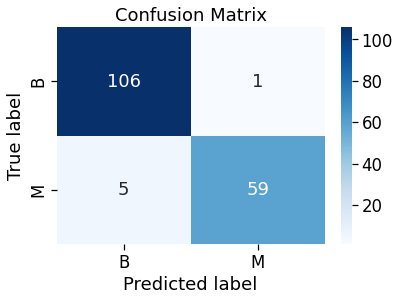

In [85]:
steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors' : np.arange(1, 50)}


k_nn = GridSearchCV(pipeline, param_grid=parameters)
k_nn.fit(X_train, y_train)
y_pred = k_nn.predict(X_test)

print(k_nn.best_params_)
print()
print(classification_report(y_test, y_pred))
print("Best score is: {}".format(k_nn.best_score_))

ConfMatrix = confusion_matrix(y_test,k_nn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")

### Support  Vector Machine

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}
Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0    0.97248   0.99065   0.98148       107
           1    0.98387   0.95312   0.96825        64

    accuracy                        0.97661       171
   macro avg    0.97817   0.97189   0.97487       171
weighted avg    0.97674   0.97661   0.97653       171

Best score is: 0.9849244322928533


Text(0.5, 1.0, 'Confusion Matrix')

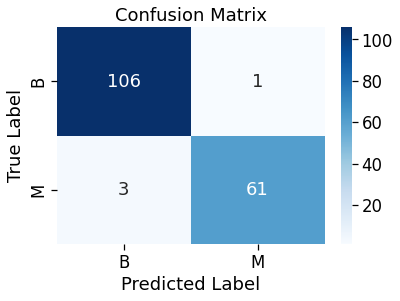

In [91]:
# setup the pipeline
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter : C is regularization strength,
# gamma controls the kernel coefficient.
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Initialize the GridSearchCV
cv = GridSearchCV(pipeline, param_grid= parameters, cv= 3)

# Fit to the training 
cv.fit(X_train, y_train)

# prediction
y_pred = cv.predict(X_test)

#Compute metrics
print('Tuned Model Parameters: {}'.format(cv.best_params_))
print('Accuracy: {}'.format(cv.score(X_test,y_test)))
print(classification_report(y_test, y_pred, digits=5))
print('Best score is: {}'.format(cv.best_score_))

ConfMatrix = confusion_matrix(y_test, cv.predict(X_test))
sns.heatmap(data= ConfMatrix, annot= True, cmap= 'Blues', fmt='d',
           xticklabels= ['B', 'M'], yticklabels= ['B', 'M'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')



### Logistic Regression

C:\Users\ercan.tuncay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ercan.tuncay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

C:\Users\ercan.tuncay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ercan.tuncay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

C:\Users\ercan.tuncay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ercan.tuncay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

C:\Users\ercan.tuncay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ercan.tuncay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Accuracy: 0.9649122807017544

              precision    recall  f1-score   support

           0    0.97248   0.99065   0.98148       107
           1    0.98387   0.95312   0.96825        64

    accuracy                        0.97661       171
   macro avg    0.97817   0.97189   0.97487       171
weighted avg    0.97674   0.97661   0.97653       171

Best score is 0.9396835443037975


Text(0.5, 1.0, 'Confusion Matrix')

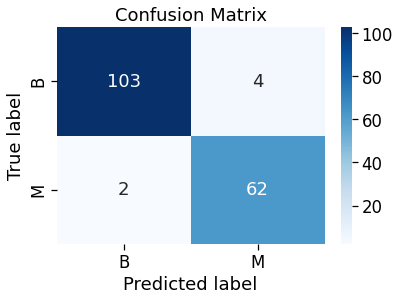

In [92]:
# setup the hyperparameter grid
param_grid = {'C': np.logspace(-5, 8, 15)}

# instantiate a logistic regression classifier
logreg = LogisticRegression()

# instantiate the GridSearchCV
logreg_cv = GridSearchCV(logreg, param_grid, cv= 5)

#fit it to data
logreg_cv.fit(X_train, y_train)

# print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Accuracy: {}'.format(logreg_cv.score(X_test,y_test)))
print()
print(classification_report(y_test, y_pred, digits=5))
print("Best score is {}".format(logreg_cv.best_score_))

ConfMatrix = confusion_matrix(y_test,logreg_cv.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")



### Random Forest Classifier

Accuracy: 0.9649122807017544

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.97      0.94      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Average 5-Fold CV Score: 0.9596180717279925 , Standard deviation: 0.023244195656399187


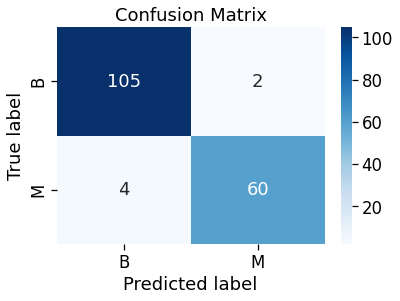

In [88]:
Ran = RandomForestClassifier(n_estimators= 50)
Ran.fit(X_train, y_train)
y_pred =  Ran.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

#5-fold cross-validation
cv_scores = cross_val_score(Ran, X, y, cv=5)

#print 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print()
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)), 
      ", Standard deviation: {}".format(np.std(cv_scores)))

ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

### Decision Tree Classifier

Tuned Decision Tree Parameters: {'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'entropy'}
Accuracy: 0.9649122807017544

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.92      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Best score is 0.9420886075949367


Text(0.5, 1.0, 'Confusion Matrix')

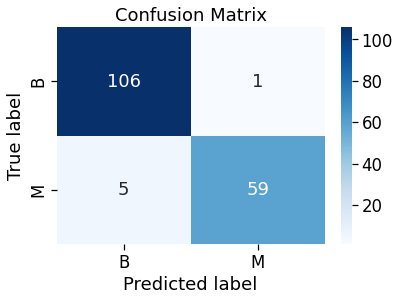

In [93]:

# setup the parameters
param_dist = {"max_depth": [3, None],
              "min_samples_leaf": [1,2,3,4,5,6,7,8],
              "criterion": ["gini", "entropy"]}

# instantiate decision tree classifier
tree = DecisionTreeClassifier()

# instantiate RandomizedSearchCv
tree_cv = RandomizedSearchCV(tree, param_dist, cv= 5)

# fit it to the training
tree_cv.fit(X_train, y_train)

#prediction
y_pred = tree_cv.predict(X_test)

# print the tuned parameters and score
print('Tuned Decision Tree Parameters: {}'.format(tree_cv.best_params_))
print('Accuracy: {}'.format(tree_cv.score(X_test,y_test)))
print()
print(classification_report(y_test, y_pred))
print('Best score is {}'.format(tree_cv.best_score_))

ConfMatrix = confusion_matrix(y_test, tree_cv.predict(X_test))
sns.heatmap(ConfMatrix, annot= True, cmap= 'Blues', fmt= 'd',
           xticklabels= ['B', 'M'], yticklabels= ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")


### Conclusion
In this notebook we examine the efficacy of classifiers such as Random Forests, Support Vector Machines, Logistic Regression, KNN and Decision Tree on the accuracy of classifying the masses in the dataset as benign/malignant. Results indicate that Support Vector machines give the best accuracy of all the models attempted. This indicates that there are non-linearities present in the dataset and that the Support vector machine does a good job of mapping the data into a higher dimensional space in which the non-linearities fade away and the data becomes linearly separable by large margin classifier like the support vector machine.